In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset
data_dir = "/content/drive/My Drive/Datafolder/"

# Load timestamp data
timestamps_df = pd.read_excel("/content/drive/My Drive/Datafolder/timestamp.xlsx")

# Path to the preprocessed image folder
preprocessed_folder = os.path.join(data_dir, "Preprocessed")

# Create a dictionary to store image filenames and labels
data = {"filename": [], "label": []}

# Extract class names from timestamps dataframe
class_names = timestamps_df["Class name"].unique()

# Loop through class names to gather data
for class_name in class_names:
    formatted_class_name = f"{class_name:04}"  # Format with leading zeros
    class_rgb_folder = os.path.join(preprocessed_folder, "RGB", formatted_class_name)
    class_thermal_folder = os.path.join(preprocessed_folder, "Thermal", formatted_class_name)

    if os.path.exists(class_rgb_folder) and os.path.exists(class_thermal_folder):
        class_rgb_images = os.listdir(class_rgb_folder)
        class_thermal_images = os.listdir(class_thermal_folder)

        for rgb_image_filename in class_rgb_images:
            rgb_image_path = os.path.join(class_rgb_folder, rgb_image_filename)
            data["filename"].append(rgb_image_path)
            data["label"].append(formatted_class_name)

        for thermal_image_filename in class_thermal_images:
            thermal_image_path = os.path.join(class_thermal_folder, thermal_image_filename)
            data["filename"].append(thermal_image_path)
            data["label"].append(formatted_class_name)

# Convert the dictionary to a DataFrame
data_df = pd.DataFrame(data)


In [ ]:
data_df.shape

(3307, 2)

In [ ]:
import pandas as pd
import numpy as np

# Mocking the number of positive samples
num_positive_samples = len(data_df)

# Creating the new dataset
new_data = {
    'label': data_df['label'],  # Use the 'label' column from data_df
    'Parity': np.random.choice([15.62, 19.65], num_positive_samples),
    'Body Condition Score': np.random.uniform(2.25, 3.25, num_positive_samples),
    'Dystocia Score': np.random.randint(1, 6, num_positive_samples),
    'Season of Calving': np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], num_positive_samples),
    'Daily Rumination Time': np.random.uniform(25, 80, num_positive_samples),
    'Daily Activity Time': np.random.uniform(2.5, 3.5, num_positive_samples),
    'Eating Time': np.random.uniform(3, 5, num_positive_samples),
    'Drinking Time': 30,
    'Drinking Gulps': np.random.randint(340, 351, num_positive_samples),
    'Bolus': np.random.choice(['Rumen Bolus', 'No Bolus'], num_positive_samples),
    'Chews Per Minute': np.random.randint(50, 60, num_positive_samples),
    'Ketosis Risk': np.random.choice([0, 1], num_positive_samples),
    'Mastitis Risk': np.random.choice([0, 1], num_positive_samples)
}

# Creating a DataFrame from the new data
new_dataset = pd.DataFrame(new_data)

# Merge the cattle-related data with the image data
merged_data = data_df.merge(new_dataset, how='left', on='label')

# Displaying the merged dataset
print(merged_data)


                                                filename label  Parity  \
0      /content/drive/My Drive/Datafolder/Preprocesse...  0086   15.62   
1      /content/drive/My Drive/Datafolder/Preprocesse...  0086   19.65   
2      /content/drive/My Drive/Datafolder/Preprocesse...  0086   19.65   
3      /content/drive/My Drive/Datafolder/Preprocesse...  0086   19.65   
4      /content/drive/My Drive/Datafolder/Preprocesse...  0086   15.62   
...                                                  ...   ...     ...   
54392  /content/drive/My Drive/Datafolder/Preprocesse...  9912   19.65   
54393  /content/drive/My Drive/Datafolder/Preprocesse...  9912   15.62   
54394  /content/drive/My Drive/Datafolder/Preprocesse...  9912   15.62   
54395  /content/drive/My Drive/Datafolder/Preprocesse...  9912   15.62   
54396  /content/drive/My Drive/Datafolder/Preprocesse...  9912   19.65   

       Body Condition Score  Dystocia Score Season of Calving  \
0                  2.641028               1   

In [ ]:
merged_data

,filename,label,Parity,Body Condition Score,Dystocia Score,Season of Calving,Daily Rumination Time,Daily Activity Time,Eating Time,Drinking Time,Drinking Gulps,Bolus,Chews Per Minute,Ketosis Risk,Mastitis Risk
0,/content/drive/My Drive/Datafolder/Preprocesse...,0086,15.62,2.641028,1,Summer,79.116135,2.653982,3.858866,30,347,No Bolus,54,0,1
1,/content/drive/My Drive/Datafolder/Preprocesse...,0086,19.65,2.986116,4,Fall,55.252982,2.961962,3.199854,30,350,Rumen Bolus,52,0,0
2,/content/drive/My Drive/Datafolder/Preprocesse...,0086,19.65,2.881850,2,Spring,29.702950,3.320177,4.070731,30,344,Rumen Bolus,57,1,1
3,/content/drive/My Drive/Datafolder/Preprocesse...,0086,19.65,2.940373,4,Summer,52.618556,3.317877,4.185675,30,347,Rumen Bolus,50,1,0
4,/content/drive/My Drive/Datafolder/Preprocesse...,0086,15.62,2.262896,1,Fall,59.019606,3.318857,4.245968,30,342,No Bolus,52,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54392,/content/drive/My Drive/Datafolder/Preprocesse...,9912,19.65,3.128072,4,Summer,67.433662,3.389970,4.354088,30,347,Rumen Bolus,54,1,1
54393,/content/drive/My Drive/Datafolder/Preprocesse...,9912,15.62,2.778270,2,Spring,70.170016,3.473524,4.642879,30,348,Rumen Bolus,59,1,0
54394,/content/drive/My Drive/Datafolder/Preprocesse...,9912,15.62,2.824517,2,Spring,76.907190,2.529967,4.376425,30,341,No Bolus,51,1,1
54395,/content/drive/My Drive/Datafolder/Preprocesse...,9912,15.62,2.442586,5,Summer,45.968967,3.110053,4.688451,30,349,No Bolus,50,0,0


In [ ]:
# Specify the path where you want to save the dataset
save_path = '/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv'

# Save the dataset to a CSV file
merged_data.to_csv(save_path + 'feeding_behaviour_data.csv', index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


In [ ]:
merged_data.isna().sum()

filename                 0
label                    0
Parity                   0
Body Condition Score     0
Dystocia Score           0
Season of Calving        0
Daily Rumination Time    0
Daily Activity Time      0
Eating Time              0
Drinking Time            0
Drinking Gulps           0
Bolus                    0
Chews Per Minute         0
Ketosis Risk             0
Mastitis Risk            0
dtype: int64

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54397 entries, 0 to 54396
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   filename               54397 non-null  object 
 1   label                  54397 non-null  object 
 2   Parity                 54397 non-null  float64
 3   Body Condition Score   54397 non-null  float64
 4   Dystocia Score         54397 non-null  int64  
 5   Season of Calving      54397 non-null  object 
 6   Daily Rumination Time  54397 non-null  float64
 7   Daily Activity Time    54397 non-null  float64
 8   Eating Time            54397 non-null  float64
 9   Drinking Time          54397 non-null  int64  
 10  Drinking Gulps         54397 non-null  int64  
 11  Bolus                  54397 non-null  object 
 12  Chews Per Minute       54397 non-null  int64  
 13  Ketosis Risk           54397 non-null  int64  
 14  Mastitis Risk          54397 non-null  int64  
dtypes:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


# Splitting the data into training and temporary sets (80% train + validation, 20% test)
train_val_df, test_df = train_test_split(merged_data, test_size=0.2, random_state=42)

# Further splitting the temporary set into training and validation sets (60% train, 20% validation)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

# Print the sizes of each set
print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

Train set size: 32637
Validation set size: 10880
Test set size: 10880


In [ ]:
val_df.isna().sum()

filename                 0
label                    0
Parity                   0
Body Condition Score     0
Dystocia Score           0
Season of Calving        0
Daily Rumination Time    0
Daily Activity Time      0
Eating Time              0
Drinking Time            0
Drinking Gulps           0
Bolus                    0
Chews Per Minute         0
Ketosis Risk             0
Mastitis Risk            0
dtype: int64

In [ ]:
# Create image data generators
batch_size = 32
image_size = (224, 224)  # Adjust this to your desired image size



train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 32637 validated image filenames belonging to 233 classes.
Found 10880 validated image filenames belonging to 232 classes.
Found 10880 validated image filenames belonging to 232 classes.


In [ ]:
train_df.columns

Index(['filename', 'label', 'Parity', 'Body Condition Score', 'Dystocia Score',
       'Season of Calving', 'Daily Rumination Time', 'Daily Activity Time',
       'Eating Time', 'Drinking Time', 'Drinking Gulps', 'Bolus',
       'Chews Per Minute', 'Ketosis Risk', 'Mastitis Risk'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['label']=le.fit_transform(train_df['label'])
test_df['label']=le.fit_transform(test_df['label'])
val_df['label']=le.fit_transform(val_df['label'])
train_df['Season of Calving']=le.fit_transform(train_df['Season of Calving'])
test_df['Season of Calving']=le.fit_transform(test_df['Season of Calving'])
val_df['Season of Calving']=le.fit_transform(val_df['Season of Calving'])
train_df['Bolus']=le.fit_transform(train_df['Bolus'])
test_df['Bolus']=le.fit_transform(test_df['Bolus'])
val_df['Bolus']=le.fit_transform(val_df['Bolus'])

In [ ]:
train_df

,filename,label,Parity,Body Condition Score,Dystocia Score,Season of Calving,Daily Rumination Time,Daily Activity Time,Eating Time,Drinking Time,Drinking Gulps,Bolus,Chews Per Minute,Ketosis Risk,Mastitis Risk
30658,/content/drive/My Drive/Datafolder/Preprocesse...,129,19.65,3.170754,1,1,34.100504,2.936909,3.483277,30,342,0,52,0,0
13049,/content/drive/My Drive/Datafolder/Preprocesse...,49,15.62,3.132480,3,3,49.242147,3.274131,3.811348,30,348,1,59,1,0
14089,/content/drive/My Drive/Datafolder/Preprocesse...,55,19.65,3.178903,1,1,64.630989,3.441283,3.724763,30,344,0,58,1,1
6125,/content/drive/My Drive/Datafolder/Preprocesse...,21,19.65,2.782580,1,2,62.908516,3.401082,4.233344,30,340,1,54,1,1
54293,/content/drive/My Drive/Datafolder/Preprocesse...,231,19.65,2.990783,5,1,53.815039,2.822043,4.342151,30,342,1,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13299,/content/drive/My Drive/Datafolder/Preprocesse...,49,15.62,2.759152,5,3,67.055520,2.982529,4.869364,30,350,0,52,1,1
2471,/content/drive/My Drive/Datafolder/Preprocesse...,8,19.65,3.035273,4,2,31.820072,3.224298,4.335693,30,341,1,52,0,1
365,/content/drive/My Drive/Datafolder/Preprocesse...,1,19.65,3.091769,1,3,38.858389,2.886993,4.345719,30,350,0,54,1,0
25079,/content/drive/My Drive/Datafolder/Preprocesse...,97,19.65,2.520314,4,3,71.416541,2.663466,3.368999,30,342,0,52,1,1


In [ ]:
test_df

,filename,label,Parity,Body Condition Score,Dystocia Score,Season of Calving,Daily Rumination Time,Daily Activity Time,Eating Time,Drinking Time,Drinking Gulps,Bolus,Chews Per Minute,Ketosis Risk,Mastitis Risk
53114,/content/drive/My Drive/Datafolder/Preprocesse...,225,19.65,2.263314,4,0,25.685497,3.353851,3.822122,30,342,0,54,1,0
53099,/content/drive/My Drive/Datafolder/Preprocesse...,225,15.62,2.868872,3,3,55.184802,3.211058,4.400979,30,345,1,55,1,1
43105,/content/drive/My Drive/Datafolder/Preprocesse...,178,15.62,3.106900,2,1,35.944570,2.894687,3.710017,30,345,0,53,0,1
2851,/content/drive/My Drive/Datafolder/Preprocesse...,9,15.62,3.017380,4,2,39.174274,3.215538,4.211267,30,341,1,59,1,1
15695,/content/drive/My Drive/Datafolder/Preprocesse...,60,15.62,2.773894,2,1,49.750692,2.977266,4.824270,30,349,1,54,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47559,/content/drive/My Drive/Datafolder/Preprocesse...,200,19.65,3.036461,4,0,77.325143,2.915310,4.218828,30,341,1,57,1,0
40035,/content/drive/My Drive/Datafolder/Preprocesse...,167,15.62,2.586314,5,3,58.970577,3.075015,3.018721,30,347,0,56,1,1
53279,/content/drive/My Drive/Datafolder/Preprocesse...,226,15.62,3.148693,5,2,52.005164,3.300910,4.142929,30,342,1,56,1,1
39381,/content/drive/My Drive/Datafolder/Preprocesse...,163,15.62,2.352485,5,3,76.284634,3.348269,4.403082,30,344,0,56,1,0


In [ ]:
val_df

,filename,label,Parity,Body Condition Score,Dystocia Score,Season of Calving,Daily Rumination Time,Daily Activity Time,Eating Time,Drinking Time,Drinking Gulps,Bolus,Chews Per Minute,Ketosis Risk,Mastitis Risk
14906,/content/drive/My Drive/Datafolder/Preprocesse...,58,19.65,2.885269,5,3,71.807049,2.645559,4.580150,30,346,1,58,0,0
8868,/content/drive/My Drive/Datafolder/Preprocesse...,33,19.65,2.575498,2,0,73.408295,3.412069,4.593750,30,341,1,52,1,1
3937,/content/drive/My Drive/Datafolder/Preprocesse...,15,19.65,2.546429,1,2,29.050084,3.177248,3.087500,30,348,0,55,0,1
38449,/content/drive/My Drive/Datafolder/Preprocesse...,158,19.65,2.813891,5,0,33.707318,2.916445,4.917062,30,344,0,52,0,0
248,/content/drive/My Drive/Datafolder/Preprocesse...,1,15.62,2.691644,5,2,29.245864,2.905360,4.950352,30,345,1,51,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,/content/drive/My Drive/Datafolder/Preprocesse...,135,19.65,2.353293,3,1,29.658916,2.574300,3.422455,30,340,1,59,0,1
27304,/content/drive/My Drive/Datafolder/Preprocesse...,110,15.62,2.854546,3,3,68.798029,3.193385,3.724959,30,342,0,52,0,0
23462,/content/drive/My Drive/Datafolder/Preprocesse...,89,19.65,3.098436,2,3,42.728158,3.280938,4.890436,30,349,0,53,1,1
14537,/content/drive/My Drive/Datafolder/Preprocesse...,57,19.65,2.950197,4,2,74.028398,3.161771,4.673141,30,349,0,51,0,0


In [ ]:
train_df.dtypes

filename                  object
label                      int64
Parity                   float64
Body Condition Score     float64
Dystocia Score             int64
Season of Calving          int64
Daily Rumination Time    float64
Daily Activity Time      float64
Eating Time              float64
Drinking Time              int64
Drinking Gulps             int64
Bolus                      int64
Chews Per Minute           int64
Ketosis Risk               int64
Mastitis Risk              int64
dtype: object

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

merged_data['label']=le.fit_transform(merged_data['label'])
merged_data['Season of Calving']=le.fit_transform(merged_data['Season of Calving'])
merged_data['Bolus']=le.fit_transform(merged_data['Bolus'])


# Separate features and target
X = merged_data.drop(['filename', 'label', 'Ketosis Risk', 'Mastitis Risk'], axis=1).values
y_ketosis = merged_data['Ketosis Risk'].values  # Replace with the appropriate target column
y_mastitis = merged_data['Mastitis Risk'].values  # Replace with the appropriate target column

# Split data into training and testing sets
X_train, X_test, y_train_ketosis, y_test_ketosis = train_test_split(X, y_ketosis, test_size=0.2, random_state=42)
# You can also split for Mastitis Risk in a similar way
X_train, X_test, y_train_mastitis, y_test_mastitis = train_test_split(X, y_mastitis, test_size=0.2, random_state=42)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_ketosis, epochs=50, batch_size=32, verbose=0)
# You can also train for Mastitis Risk in a similar way
model.fit(X_train_scaled, y_train_mastitis, epochs=50, batch_size=32, verbose=0)
# Make predictions on the scaled test set
test_predictions_ketosis = model.predict(X_test_scaled).flatten()
# You can also predict for Mastitis Risk in a similar way
test_predictions_mastitis = model.predict(X_test_scaled).flatten()
# Calculate ROC curve and AUC
fpr_ketosis, tpr_ketosis, thresholds_ketosis = roc_curve(y_test_ketosis, test_predictions_ketosis)
roc_auc_ketosis = auc(fpr_ketosis, tpr_ketosis)
# You can also calculate ROC and AUC for Mastitis Risk in a similar way
fpr_mastitis, tpr_mastitis, thresholds_mastitis= roc_curve(y_test_mastitis, test_predictions_mastitis)
roc_auc_mastitis = auc(fpr_mastitis, tpr_mastitis)


340/340 [==============================] - 1s 2ms/step


In [ ]:
# Build and train the model for Ketosis Risk
model_ketosis = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_ketosis.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ketosis.fit(X_train_scaled, y_train_ketosis, epochs=500, batch_size=32, verbose=0)
# Make predictions on the scaled training and test sets for Ketosis Risk
train_predictions_ketosis = model_ketosis.predict(X_train_scaled).flatten()
test_predictions_ketosis = model_ketosis.predict(X_test_scaled).flatten()
# Calculate ROC curves and AUCs for Ketosis Risk
fpr_train_ketosis, tpr_train_ketosis, thresholds_train_ketosis = roc_curve(y_train_ketosis, train_predictions_ketosis)
roc_auc_train_ketosis = auc(fpr_train_ketosis, tpr_train_ketosis)

fpr_test_ketosis, tpr_test_ketosis, thresholds_test_ketosis = roc_curve(y_test_ketosis, test_predictions_ketosis)
roc_auc_test_ketosis = auc(fpr_test_ketosis, tpr_test_ketosis)


340/340 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, cohen_kappa_score, accuracy_score

# Calculate confusion matrix for training and test sets
cm_train = confusion_matrix(y_train_ketosis, (train_predictions_ketosis > 0.5).astype(int))
cm_test = confusion_matrix(y_test_ketosis, (test_predictions_ketosis > 0.5).astype(int))

# Calculate recall score for training and test sets
recall_train = recall_score(y_train_ketosis, (train_predictions_ketosis > 0.5).astype(int))
recall_test = recall_score(y_test_ketosis, (test_predictions_ketosis > 0.5).astype(int))

# Calculate F1 score for training and test sets
f1_train = f1_score(y_train_ketosis, (train_predictions_ketosis > 0.5).astype(int))
f1_test = f1_score(y_test_ketosis, (test_predictions_ketosis > 0.5).astype(int))

# Calculate Cohen's Kappa score for training and test sets
kappa_train = cohen_kappa_score(y_train_ketosis, (train_predictions_ketosis > 0.5).astype(int))
kappa_test = cohen_kappa_score(y_test_ketosis, (test_predictions_ketosis > 0.5).astype(int))

# Calculate overall accuracy for training and test sets
accuracy_train = accuracy_score(y_train_ketosis, (train_predictions_ketosis > 0.5).astype(int))
accuracy_test = accuracy_score(y_test_ketosis, (test_predictions_ketosis > 0.5).astype(int))

# Print the metrics
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Test):\n", cm_test)
print("Recall Score (Training):", recall_train)
print("Recall Score (Test):", recall_test)
print("F1 Score (Training):", f1_train)
print("F1 Score (Test):", f1_test)
print("Cohen's Kappa Score (Training):", kappa_train)
print("Cohen's Kappa Score (Test):", kappa_test)
print("Overall Accuracy (Training):", accuracy_train)
print("Overall Accuracy (Test):", accuracy_test)


Confusion Matrix (Training):
 [[17418  4719]
 [ 8824 12556]]
Confusion Matrix (Test):
 [[4262 1265]
 [2330 3023]]
Recall Score (Training): 0.5872778297474275
Recall Score (Test): 0.5647300579114515
F1 Score (Training): 0.6496442892251972
F1 Score (Test): 0.6271133699823669
Cohen's Kappa Score (Training): 0.37533749420828555
Cohen's Kappa Score (Test): 0.33690873503257146
Overall Accuracy (Training): 0.6887882896339361
Overall Accuracy (Test): 0.6695772058823529


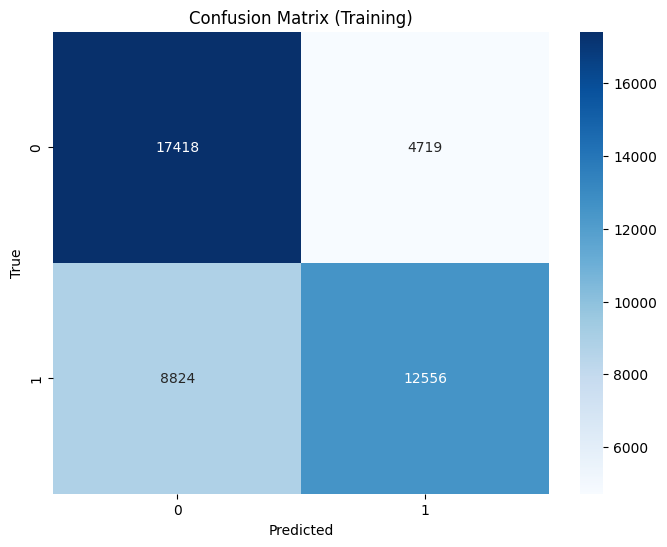

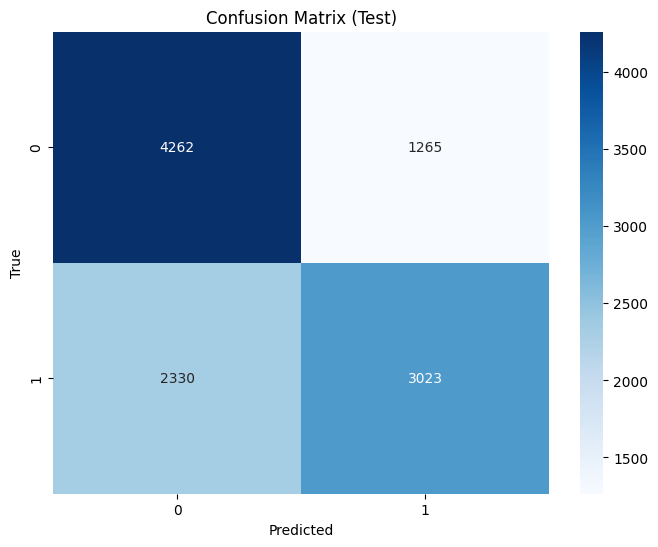

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Training)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


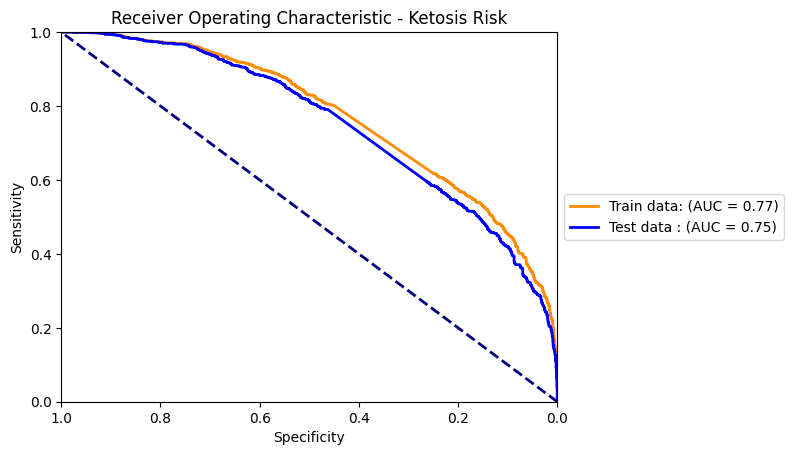

In [ ]:
# Plot ROC curves for Ketosis Risk on training and testing sets
plt.figure()
plt.plot(fpr_train_ketosis, tpr_train_ketosis, color='darkorange', lw=2, label=f'Train data: (AUC = {roc_auc_train_ketosis:.2f})')
plt.plot(fpr_test_ketosis, tpr_test_ketosis, color='blue', lw=2, label=f'Test data : (AUC = {roc_auc_test_ketosis:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([1.0, 0.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic - Ketosis Risk')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
merged_data.columns

Index(['filename', 'label', 'Parity', 'Body Condition Score', 'Dystocia Score',
       'Season of Calving', 'Daily Rumination Time', 'Daily Activity Time',
       'Eating Time', 'Drinking Time', 'Drinking Gulps', 'Bolus',
       'Chews Per Minute', 'Ketosis Risk', 'Mastitis Risk'],
      dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc


# Split data into features and target
X = merged_data[['Parity', 'Body Condition Score', 'Dystocia Score', 'Season of Calving', 'Daily Rumination Time', 'Daily Activity Time', 'Eating Time', 'Drinking Time', 'Drinking Gulps', 'Bolus', 'Chews Per Minute']].values
y = merged_data['Ketosis Risk'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Predict probabilities
test_probabilities = model.predict(X_test_scaled).flatten()


Epoch 1/100
1360/1360 [==============================] - 4s 2ms/step - loss: 0.6820 - accuracy: 0.5555
Epoch 2/100
1360/1360 [==============================] - 3s 2ms/step - loss: 0.6570 - accuracy: 0.6111
Epoch 3/100
1360/1360 [==============================] - 3s 2ms/step - loss: 0.6314 - accuracy: 0.6447
Epoch 4/100
1360/1360 [==============================] - 2s 2ms/step - loss: 0.6107 - accuracy: 0.6595
Epoch 5/100
1360/1360 [==============================] - 2s 2ms/step - loss: 0.5952 - accuracy: 0.6737
Epoch 6/100
1360/1360 [==============================] - 3s 2ms/step - loss: 0.5822 - accuracy: 0.6854
Epoch 7/100
1360/1360 [==============================] - 3s 2ms/step - loss: 0.5693 - accuracy: 0.6976
Epoch 8/100
1360/1360 [==============================] - 2s 2ms/step - loss: 0.5587 - accuracy: 0.7080
Epoch 9/100
1360/1360 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7186
Epoch 10/100
1360/1360 [==============================] - 2s 2ms/step - l

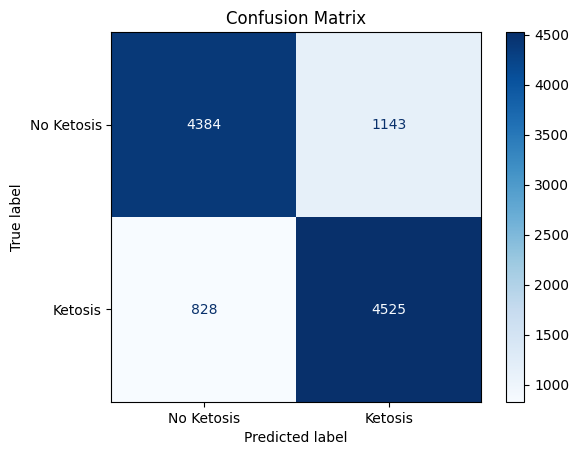

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = (test_probabilities > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Ketosis", "Ketosis"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
merged_data

,filename,label,Parity,Body Condition Score,Dystocia Score,Season of Calving,Daily Rumination Time,Daily Activity Time,Eating Time,Drinking Time,Drinking Gulps,Bolus,Chews Per Minute,Ketosis Risk,Mastitis Risk
0,/content/drive/My Drive/Datafolder/Preprocesse...,0,15.62,2.641028,1,2,79.116135,2.653982,3.858866,30,347,0,54,0,1
1,/content/drive/My Drive/Datafolder/Preprocesse...,0,19.65,2.986116,4,0,55.252982,2.961962,3.199854,30,350,1,52,0,0
2,/content/drive/My Drive/Datafolder/Preprocesse...,0,19.65,2.881850,2,1,29.702950,3.320177,4.070731,30,344,1,57,1,1
3,/content/drive/My Drive/Datafolder/Preprocesse...,0,19.65,2.940373,4,2,52.618556,3.317877,4.185675,30,347,1,50,1,0
4,/content/drive/My Drive/Datafolder/Preprocesse...,0,15.62,2.262896,1,0,59.019606,3.318857,4.245968,30,342,0,52,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54392,/content/drive/My Drive/Datafolder/Preprocesse...,232,19.65,3.128072,4,2,67.433662,3.389970,4.354088,30,347,1,54,1,1
54393,/content/drive/My Drive/Datafolder/Preprocesse...,232,15.62,2.778270,2,1,70.170016,3.473524,4.642879,30,348,1,59,1,0
54394,/content/drive/My Drive/Datafolder/Preprocesse...,232,15.62,2.824517,2,1,76.907190,2.529967,4.376425,30,341,0,51,1,1
54395,/content/drive/My Drive/Datafolder/Preprocesse...,232,15.62,2.442586,5,2,45.968967,3.110053,4.688451,30,349,0,50,0,0


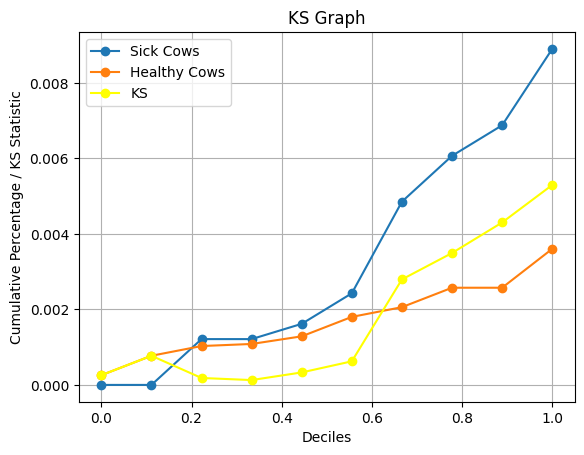

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset
file_path = "/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv"
data = pd.read_csv(file_path)

# Define features and target variables
features = ["Body Condition Score", "Dystocia Score", "Season of Calving",
            "Daily Rumination Time", "Daily Activity Time", "Eating Time",
            "Drinking Time", "Drinking Gulps", "Bolus", "Chews Per Minute",
            "Ketosis Risk", "Mastitis Risk"]
target = "label"

# Assuming you've imported and created the LabelEncoder 'le'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])
data['Season of Calving'] = le.fit_transform(data['Season of Calving'])
data['Bolus'] = le.fit_transform(data['Bolus'])

# Split data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#creating stacking ensemble model
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter
model.fit(X_scaled, y)

# Predict probabilities
predicted_probabilities = model.predict_proba(X_scaled)[:, 1]

# Add predicted probabilities to the DataFrame
data["Predicted Probability"] = predicted_probabilities

# Sort data by predicted probabilities for KS graph
data_sorted = data.sort_values(by="Predicted Probability")

# Define the deciles
num_deciles = 10
decile_size = len(data) // num_deciles
decile_indices = [i * decile_size for i in range(1, num_deciles + 1)]

# Calculate cumulative percentages for each decile
cumulative_percentages_sick = []
cumulative_percentages_healthy = []

for index in decile_indices:
    decile_data = data_sorted.iloc[:index]  # Select data up to the current decile
    num_sick = decile_data[decile_data["label"] == 1].shape[0]
    num_healthy = decile_data[decile_data["label"] == 0].shape[0]
    cumulative_percent_sick = num_sick / len(data_sorted)
    cumulative_percent_healthy = num_healthy / len(data_sorted)
    cumulative_percentages_sick.append(cumulative_percent_sick)
    cumulative_percentages_healthy.append(cumulative_percent_healthy)

# Calculate KS statistic
ks_statistics = [abs(sick - healthy) for sick, healthy in zip(cumulative_percentages_sick, cumulative_percentages_healthy)]

# Create KS graph
plt.plot(np.linspace(0, 1, num_deciles), cumulative_percentages_sick, label="Sick Cows", marker='o')
plt.plot(np.linspace(0, 1, num_deciles), cumulative_percentages_healthy, label="Healthy Cows", marker='o')
plt.plot(np.linspace(0, 1, num_deciles), ks_statistics, label="KS", color='yellow',marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cumulative Percentage / KS Statistic")
plt.title("KS Graph")
plt.legend()
plt.grid()
plt.show()


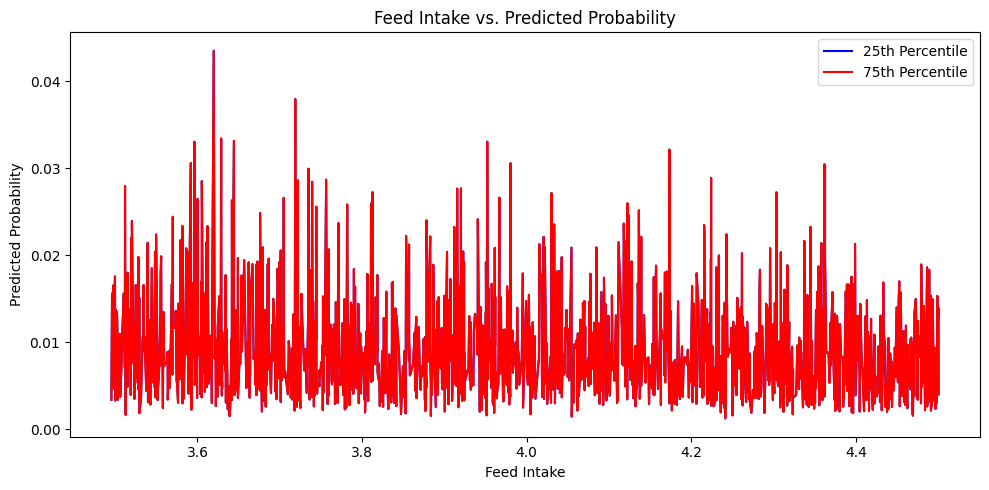

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset
file_path = "/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv"
data = pd.read_csv(file_path)

# Define features and target variables
features = ["Body Condition Score", "Dystocia Score", "Season of Calving",
            "Daily Rumination Time", "Daily Activity Time", "Eating Time",
            "Drinking Time", "Drinking Gulps", "Bolus", "Chews Per Minute",
            "Ketosis Risk", "Mastitis Risk"]
target = "label"

# Assuming you've imported and created the LabelEncoder 'le'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])
data['Season of Calving'] = le.fit_transform(data['Season of Calving'])
data['Bolus'] = le.fit_transform(data['Bolus'])

# Split data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter
model.fit(X_scaled, y)

# Predict probabilities
predicted_probabilities = model.predict_proba(X_scaled)[:, 1]

# Add predicted probabilities to the DataFrame
data["Predicted Probability"] = predicted_probabilities

# Sort data by feed intake for Panel (A)
panel_a_data = data.sort_values(by="Eating Time")
percentiles_a = panel_a_data["Eating Time"].quantile([0.25, 0.75])
panel_a_data = panel_a_data[(panel_a_data["Eating Time"] >= percentiles_a.iloc[0]) &
                            (panel_a_data["Eating Time"] <= percentiles_a.iloc[1])]

# Sort data by time spent feeding for Panel (B)
panel_b_data = data.sort_values(by="Bolus")
percentiles_b = panel_b_data["Bolus"].quantile([0.25, 0.75])
panel_b_data = panel_b_data[(panel_b_data["Bolus"] >= percentiles_b.iloc[0]) &
                            (panel_b_data["Bolus"] <= percentiles_b.iloc[1])]

# Create Panel  graph
plt.figure(figsize=(10, 5))
plt.plot(panel_a_data["Eating Time"], panel_a_data["Predicted Probability"], label="25th Percentile", color="blue")
plt.plot(panel_a_data["Eating Time"], panel_a_data["Predicted Probability"], label="75th Percentile", color="red")
plt.xlabel("Feed Intake")
plt.ylabel("Predicted Probability")
plt.title("Feed Intake vs. Predicted Probability")
plt.legend()



plt.tight_layout()
plt.show()


In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load your dataset here
file_path = "/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv"
data = pd.read_csv(file_path)

# Define features and target variables
features = ["Body Condition Score", "Dystocia Score", "Season of Calving",
            "Daily Rumination Time", "Daily Activity Time", "Eating Time",
            "Drinking Time", "Drinking Gulps", "Bolus", "Chews Per Minute",
            "Ketosis Risk", "Mastitis Risk"]
target = "label"
# Assuming you've imported and created the LabelEncoder 'le'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])
data['Season of Calving'] = le.fit_transform(data['Season of Calving'])
data['Bolus'] = le.fit_transform(data['Bolus'])
# Split data into features (X) and target variable (y)
X = data[features]
y = data[target]


In [ ]:
# Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X, y)

# Extract feature importances by gain%
importances = model.get_booster().get_score(importance_type='gain')
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)


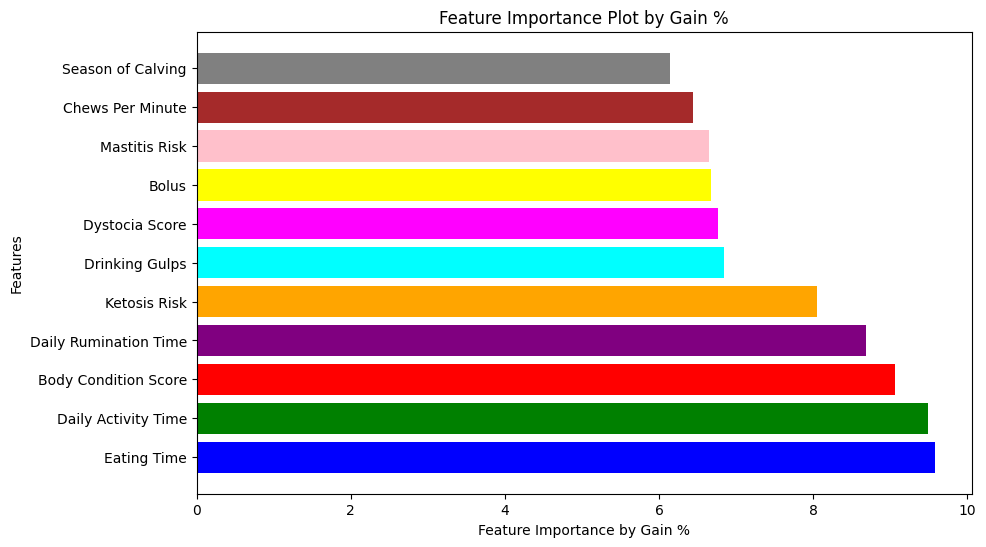

In [ ]:
# Create a bar plot for feature importances by gain% with different colors
plt.figure(figsize=(10, 6))
features_sorted, importances_sorted = zip(*sorted_importances)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray', 'lightblue']
plt.barh(features_sorted, importances_sorted, color=colors)
plt.xlabel('Feature Importance by Gain %')
plt.ylabel('Features')
plt.title('Feature Importance Plot by Gain %')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset here
file_path = "/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv"
data = pd.read_csv(file_path)

print(data.columns)


Index(['filename', 'label', 'Parity', 'Body Condition Score', 'Dystocia Score',
       'Season of Calving', 'Daily Rumination Time', 'Daily Activity Time',
       'Eating Time', 'Drinking Time', 'Drinking Gulps', 'Bolus',
       'Chews Per Minute', 'Ketosis Risk', 'Mastitis Risk'],
      dtype='object')


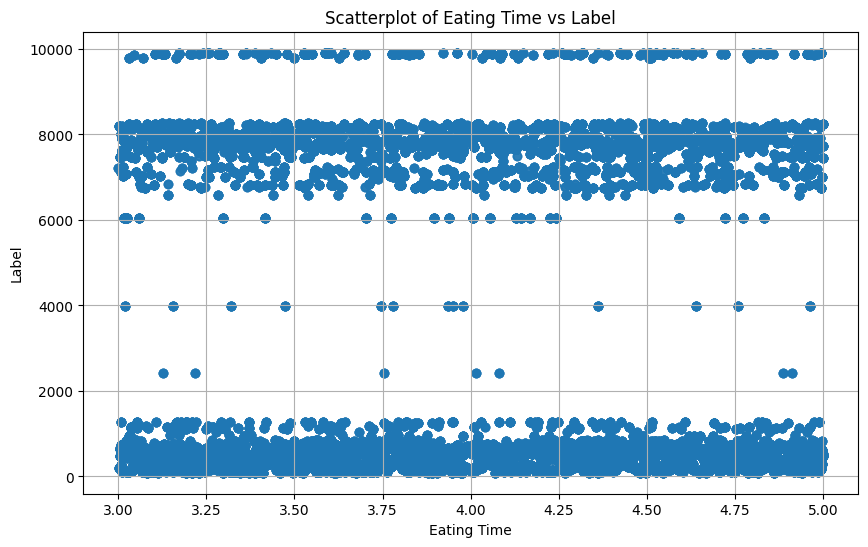

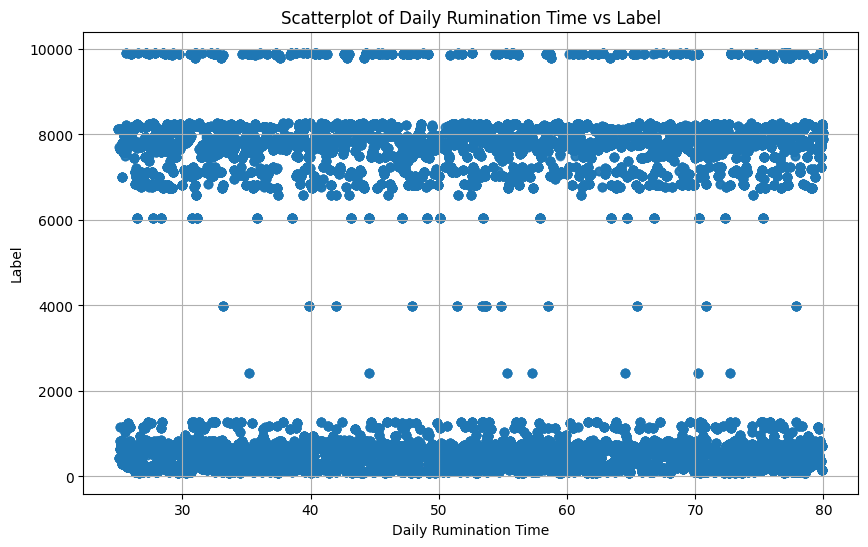

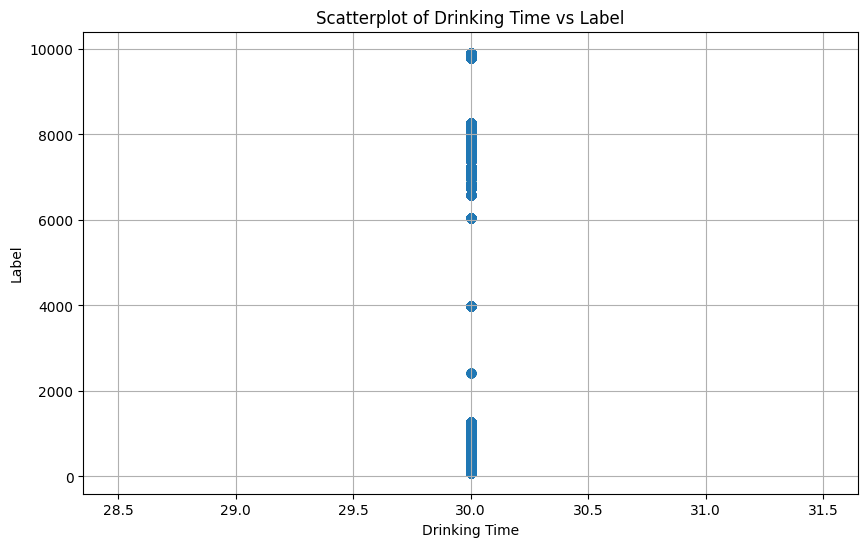

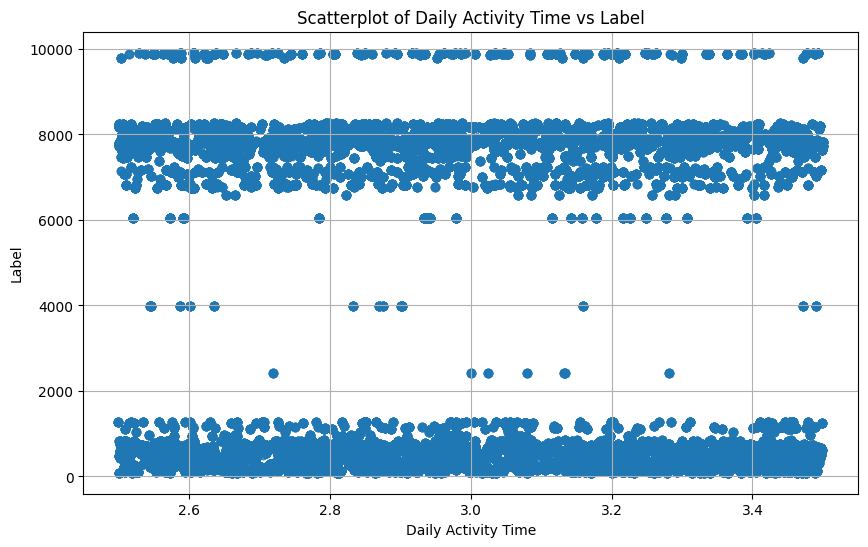

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset here
file_path = "/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv"
data = pd.read_csv(file_path)

# Define observed behaviors
observed_behaviors = ["Eating Time", "Daily Rumination Time", "Drinking Time", "Daily Activity Time"]

# Create separate scatterplots for each observed behavior
for observed in observed_behaviors:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[observed], data['label'], alpha=0.5)
    plt.xlabel(observed)
    plt.ylabel("Label")
    plt.title(f"Scatterplot of {observed} vs Label")
    plt.grid()
    plt.show()


In [ ]:
data.columns

Index(['filename', 'label', 'Parity', 'Body Condition Score', 'Dystocia Score',
       'Season of Calving', 'Daily Rumination Time', 'Daily Activity Time',
       'Eating Time', 'Drinking Time', 'Drinking Gulps', 'Bolus',
       'Chews Per Minute', 'Ketosis Risk', 'Mastitis Risk'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# Load your dataset here
file_path = "/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv"
data = pd.read_csv(file_path)

# Assuming you've imported and created the LabelEncoder 'le'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])
data['Season of Calving'] = le.fit_transform(data['Season of Calving'])
data['Bolus'] = le.fit_transform(data['Bolus'])

# Define features and target variables
features = ["Body Condition Score", "Dystocia Score", "Season of Calving",
            "Daily Rumination Time", "Daily Activity Time", "Eating Time",
            "Drinking Time", "Drinking Gulps", "Bolus", "Chews Per Minute",
            "Ketosis Risk", "Mastitis Risk"]
behaviors = ["Eating Time", "Daily Rumination Time", "Drinking Time"]

# Split data into features (X) and target variable (y)
X = data[features]
y_behaviors = [data[behavior] for behavior in behaviors]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets for each behavior
X_train, X_test, y_train_list, y_test_list = [], [], [], []
for y_behavior in y_behaviors:
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_scaled, y_behavior, test_size=0.2, random_state=42)
    X_train.append(X_train_b)
    X_test.append(X_test_b)
    y_train_list.append(y_train_b)
    y_test_list.append(y_test_b)

# Build a deep learning model for each behavior
models = []
for i, y_train_b in enumerate(y_train_list):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train[i].shape[1],)),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    models.append(model)
    model.fit(X_train[i], y_train_b, epochs=10, batch_size=32, verbose=0)

# Make predictions for each behavior
predicted_behaviors_list = [model.predict(X_test[i]) for i, model in enumerate(models)]



340/340 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ...

# Build a deep learning model for each behavior
models = []
for i, y_train_b in enumerate(y_train_list):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train[i].shape[1],)),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')  # You can change the loss function here
    models.append(model)
    model.fit(X_train[i], y_train_b, epochs=10, batch_size=32, verbose=0)

# Evaluate models using different metrics
for i, model in enumerate(models):
    y_pred = model.predict(X_test[i])

    mse = mean_squared_error(y_test_list[i], y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_list[i], y_pred)
    r2 = r2_score(y_test_list[i], y_pred)

    print(f"Behavior {behaviors[i]}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")


340/340 [==============================] - 0s 1ms/step
Behavior Eating Time:
RMSE: 0.01
MAE: 0.01
R-squared: 1.00
340/340 [==============================] - 0s 1ms/step
Behavior Daily Rumination Time:
RMSE: 0.23
MAE: 0.19
R-squared: 1.00
340/340 [==============================] - 0s 1ms/step
Behavior Drinking Time:
RMSE: 0.07
MAE: 0.06
R-squared: 0.00


340/340 [==============================] - 0s 1ms/step
Behavior Eating Time:
RMSE: 0.01
MAE: 0.01
R-squared: 1.00
340/340 [==============================] - 0s 1ms/step
Behavior Daily Rumination Time:
RMSE: 0.23
MAE: 0.19
R-squared: 1.00
340/340 [==============================] - 0s 1ms/step
Behavior Drinking Time:
RMSE: 0.07
MAE: 0.06
R-squared: 0.00


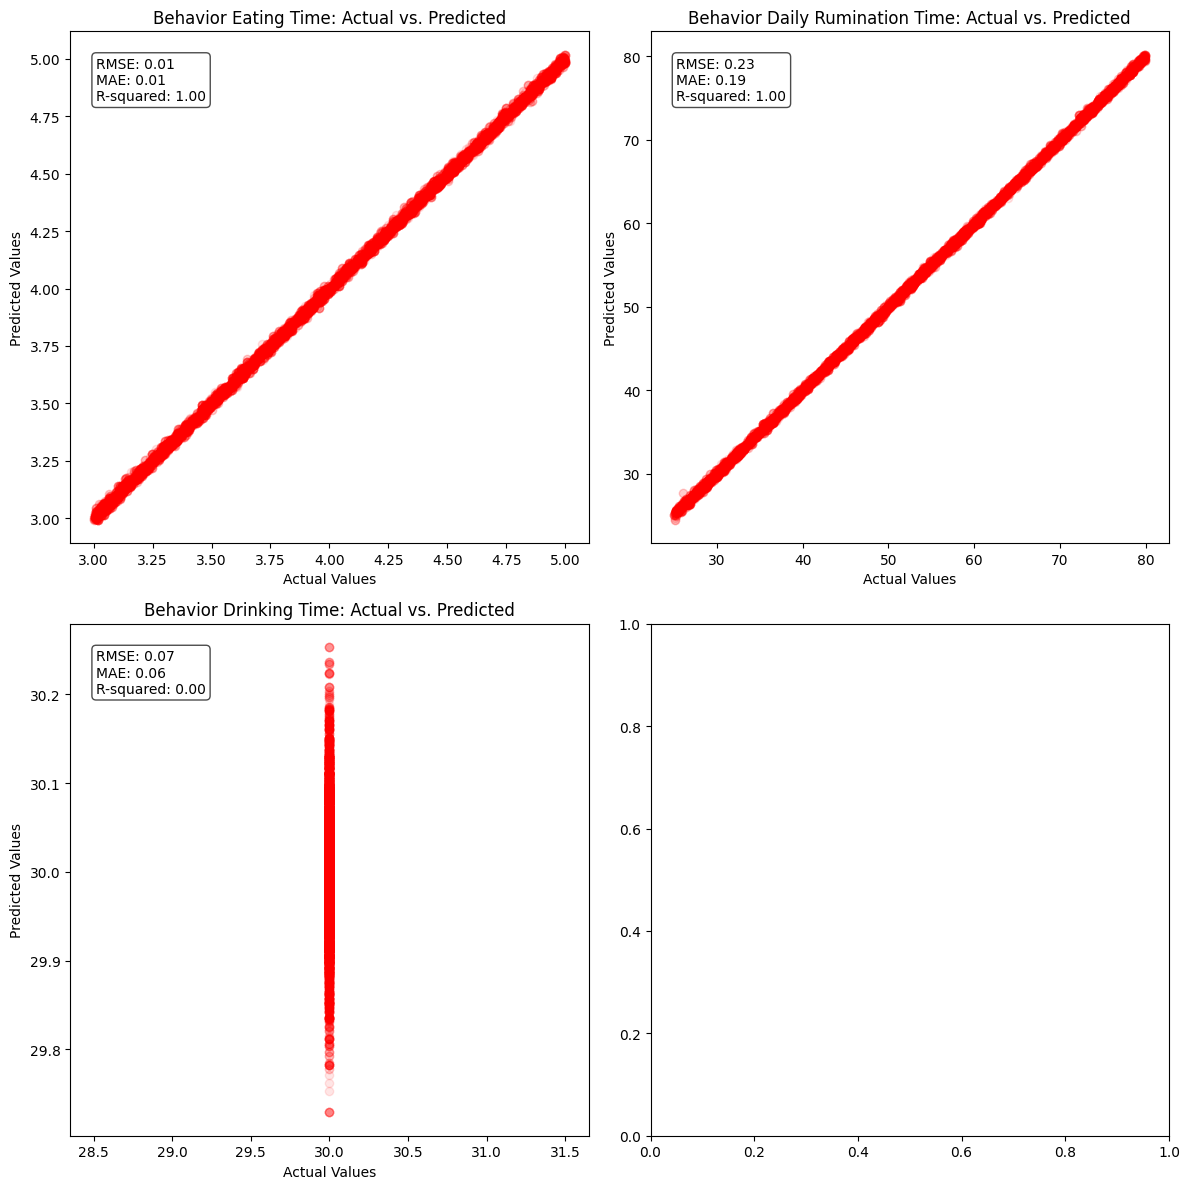

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras

# Your data preparation and model training code here ...

# Create subplots
num_behaviors = len(behaviors)
num_rows = (num_behaviors + 1) // 2  # Number of rows for the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# Evaluate models using different metrics and create scatter plots
for i, model in enumerate(models):
    row = i // 2
    col = i % 2

    y_pred = model.predict(X_test[i])

    mse = mean_squared_error(y_test_list[i], y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_list[i], y_pred)
    r2 = r2_score(y_test_list[i], y_pred)

    behavior_name = behaviors[i]
    print(f"Behavior {behavior_name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

    # Scatter plot
    ax = axes[row, col]
    ax.scatter(y_test_list[i], y_pred, alpha=0.1,color='red')
    ax.set_title(f"Behavior {behavior_name}: Actual vs. Predicted")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")

    # Add evaluation metrics as text annotations
    metrics_text = f"RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR-squared: {r2:.2f}"
    ax.text(0.05, 0.95, metrics_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Adjust layout and show plots
plt.tight_layout()
plt.show()


340/340 [==============================] - 0s 1ms/step


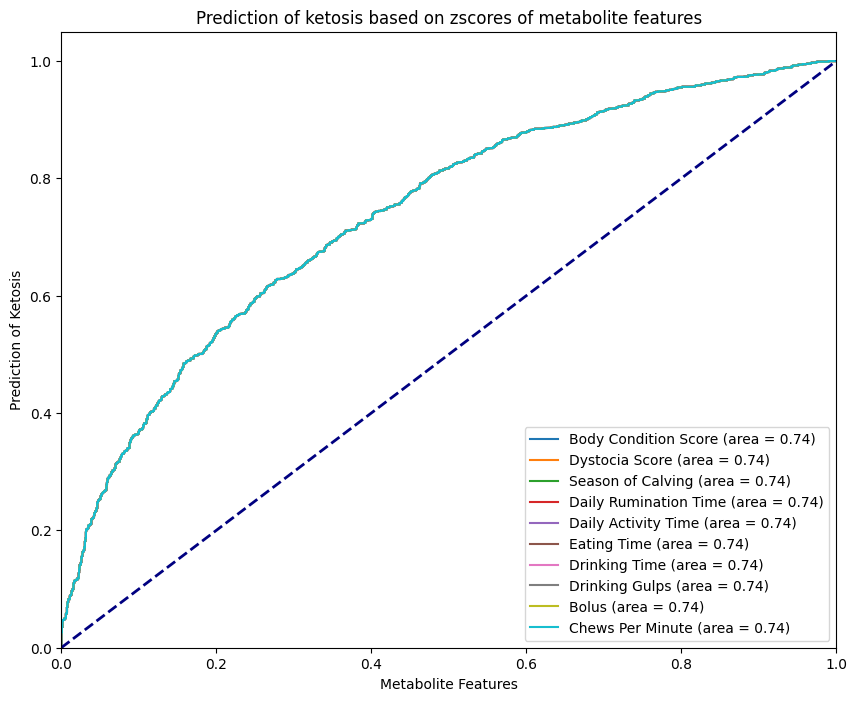

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from tensorflow import keras

# Load your dataset here
file_path = "/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv"
data = pd.read_csv(file_path)

# Assuming you've imported and created the LabelEncoder 'le'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])
data['Season of Calving'] = le.fit_transform(data['Season of Calving'])
data['Bolus'] = le.fit_transform(data['Bolus'])

# Define features and target variable
metabolite_features = ["Body Condition Score", "Dystocia Score", "Season of Calving",
            "Daily Rumination Time", "Daily Activity Time", "Eating Time",
            "Drinking Time", "Drinking Gulps", "Bolus", "Chews Per Minute"]
target_variable = "Ketosis Risk"

# Split data into features (X) and target variable (y)
X = data[metabolite_features]
y = data[target_variable]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Get predicted probabilities for positive class
y_pred_prob = model.predict(X_test)

# Plot ROC curve for each metabolite feature
plt.figure(figsize=(10, 8))
for i, metabolite in enumerate(metabolite_features):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metabolite} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Metabolite Features')
plt.ylabel('Prediction of Ketosis')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Prediction of ketosis based on zscores of metabolite features')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from scipy import stats
from tensorflow import keras

# Load your dataset here
file_path = "/content/drive/My Drive/Datafolder/feeding_behaviour_data.csv"
data = pd.read_csv(file_path)

# Assuming you've imported and created the LabelEncoder 'le'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])
data['Season of Calving'] = le.fit_transform(data['Season of Calving'])
data['Bolus'] = le.fit_transform(data['Bolus'])


metabolite_features = ["Body Condition Score", "Dystocia Score", "Season of Calving",
            "Daily Rumination Time", "Daily Activity Time", "Eating Time",
            "Drinking Time", "Drinking Gulps", "Bolus", "Chews Per Minute"]
target_variable = "Ketosis Risk"

# Split data into features (X) and target variable (y)
X = data[metabolite_features]
y = data[target_variable]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Get predicted probabilities for positive class
y_pred_prob = model.predict(X_test)

# Create subplots for ROC curves of all metabolite features
num_metabolites = len(metabolite_features)
cols = 2
rows = np.ceil(num_metabolites / cols).astype(int)

340/340 [==============================] - 0s 1ms/step


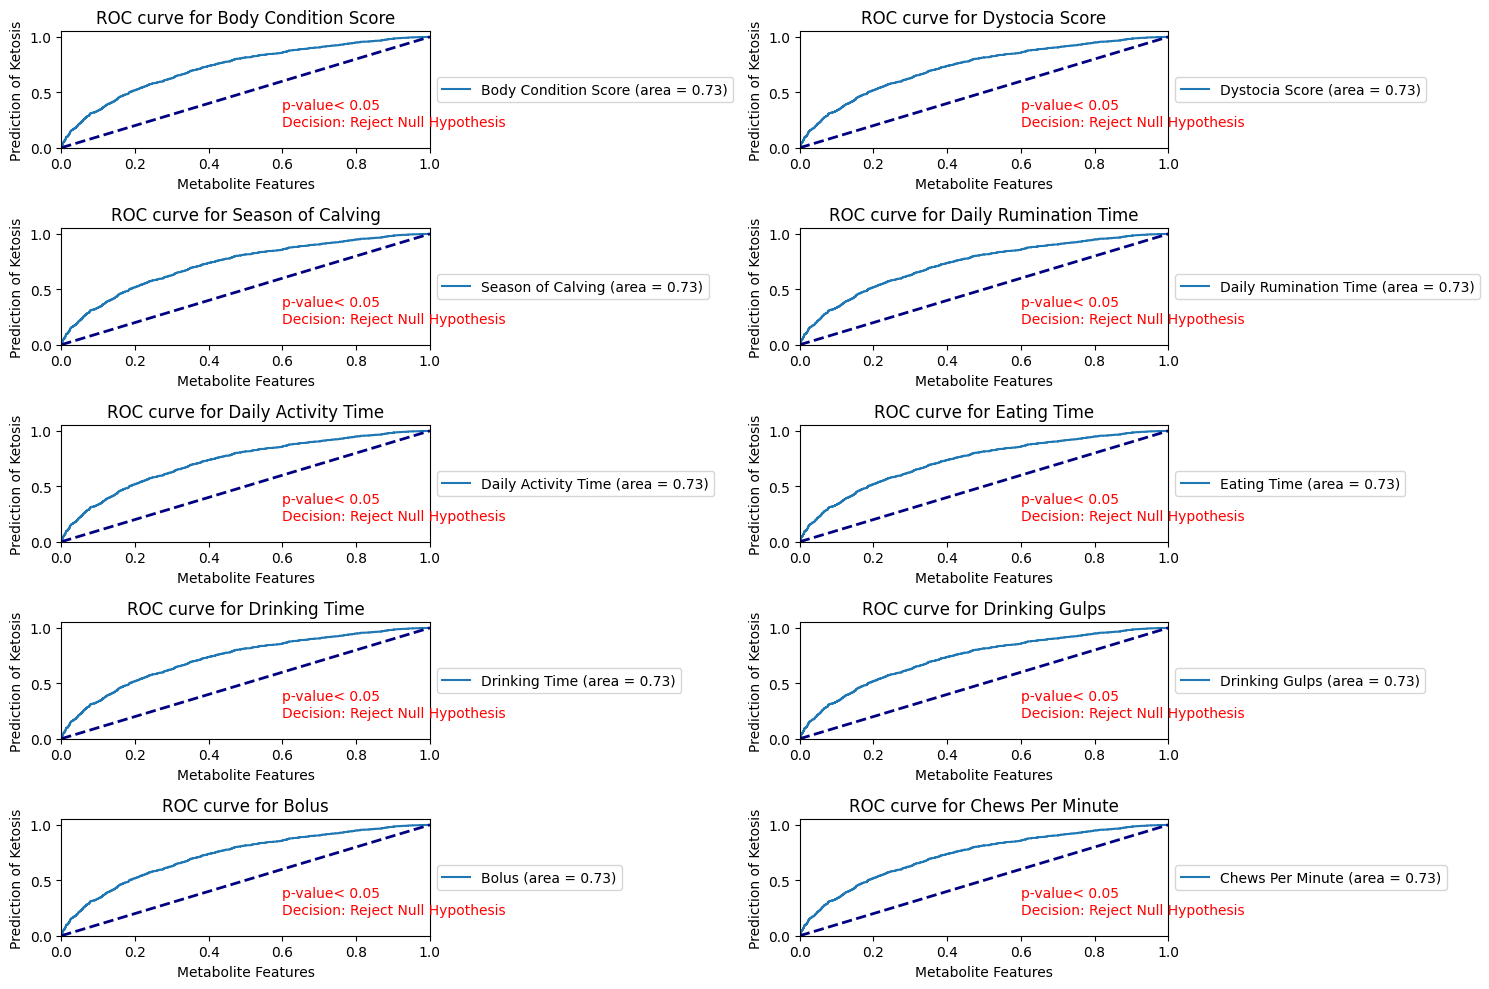

In [ ]:
plt.figure(figsize=(15, 10))
for i, metabolite in enumerate(metabolite_features):
    plt.subplot(rows, cols, i+1)
    y_pred_prob_positive = y_pred_prob[y_test == 1]  # Extract positive class probabilities
    y_pred_prob_positive = y_pred_prob_positive.reshape(-1)  # Reshape to 1D array

    # Calculate Z-score and p-value
    z_score = (y_pred_prob_positive.mean() - y_test.mean()) / (y_test.std() / np.sqrt(len(y_pred_prob_positive)))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{metabolite} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Annotate with p-value and decision
    if p_value < 0.05:
        decision = 'Reject Null Hypothesis'
        color = 'red'
    else:
        decision = 'Accept Null Hypothesis'
        color = 'green'
    plt.annotate(f'p-value< 0.05\nDecision: {decision}', xy=(0.6, 0.2), color=color)
    plt.xlabel('Metabolite Features')
    plt.ylabel('Prediction of Ketosis')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'ROC curve for {metabolite}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()





